In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. En el archivo <tt>titanic.csv</tt> encontrará una data sobre los pasajeros del Titanic. Cargue los datos en un `DataFrame`y realice gráficos que permitan visualizar las siguientes informaciones:
    1. Gráfico circular (*pie chart*) con los fallecidos y supervivientes.
    1. Histograma con las edades. 
    1. Diagrama de barras con el número de personas en cada clase. 
    1. Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.

In [2]:
pd.set_option('display.max_rows', None) 
titanic = pd.read_csv('archivos/titanic.csv',sep=',')

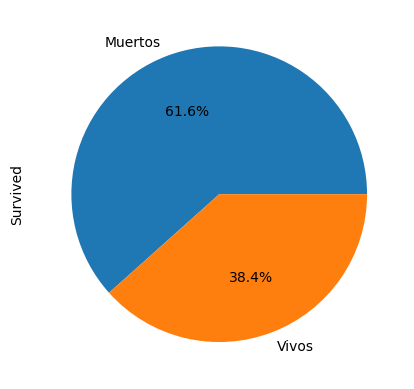

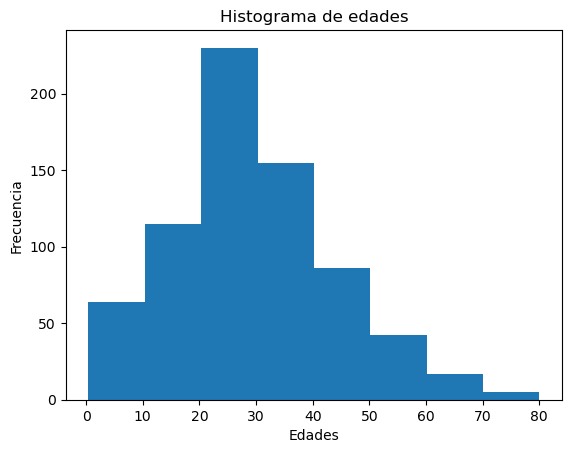

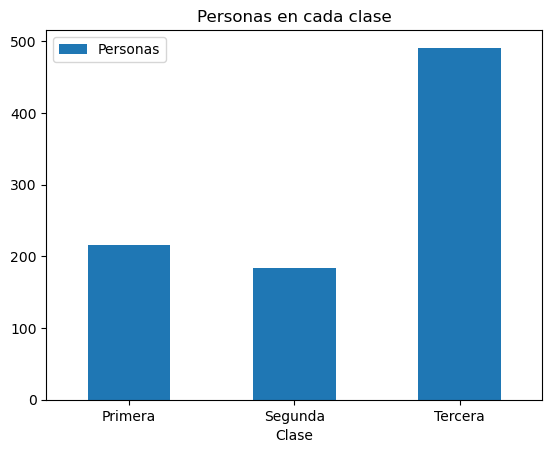

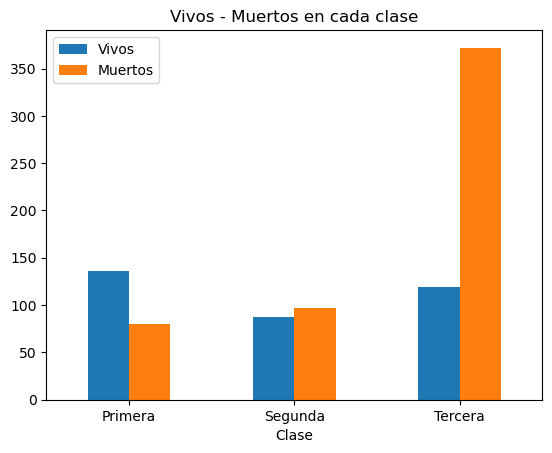

In [39]:
#condicion Pie Chart
condicionTorta = (titanic.Survived==1).value_counts() 

#Codicion num personas en cada clase
condicionPraClase = (titanic.Pclass==1).value_counts()
condicionSdaClase = (titanic.Pclass==2).value_counts()
condicionTraClase = (titanic.Pclass==3).value_counts()

#Condicion num personas vivas por clase
condicion1Vivos = ((titanic.Survived==1) & (titanic.Pclass==1)).value_counts()
condicion2Vivos = ((titanic.Survived==1) & (titanic.Pclass==2)).value_counts()
condicion3Vivos = ((titanic.Survived==1) & (titanic.Pclass==3)).value_counts()
condicion1Muertos = ((titanic.Survived==0) & (titanic.Pclass==1)).value_counts()
condicion2Muertos = ((titanic.Survived==0) & (titanic.Pclass==2)).value_counts()
condicion3Muertos = ((titanic.Survived==0) & (titanic.Pclass==3)).value_counts()

#Vector np para piechart
x = [condicionTorta.loc[True],condicionTorta.loc[False]]
labels = ['Muertos','Vivos']
condicionTorta.plot.pie(labels=labels, autopct='%1.1f%%')
plt.show()

#histograma
titanic.Age.plot.hist(bins=8)
plt.ylabel('Frecuencia')
plt.xlabel('Edades')
plt.title('Histograma de edades')
plt.show()

#diagrama de barras personas en cada clase
Personas = pd.DataFrame({'Personas':[condicionPraClase.loc[True],condicionSdaClase.loc[True],condicionTraClase.loc[True]],'Clase':['Primera','Segunda','Tercera']}, index=['Primera','Segunda','Tercera'])
Personas.plot.bar(x='Clase',y='Personas',rot=0)
plt.xlabel('Clase')
plt.title('Personas en cada clase')
plt.show()

#diagrama de barras vivos y muertos de cada clase
Sobrevivientes = pd.DataFrame({'Vivos':[condicion1Vivos.loc[True],condicion2Vivos.loc[True],condicion3Vivos.loc[True]],'Muertos':[condicion1Muertos.loc[True],condicion2Muertos.loc[True],condicion3Muertos.loc[True]]}, index=['Primera','Segunda','Tercera'])
Sobrevivientes.plot.bar(rot=0)
plt.xlabel('Clase')
plt.title('Vivos - Muertos en cada clase')
plt.show()

#### 2. Con base en la data del archivo <tt>fallecidos_covid.xlsx</tt>, haga una visualización de diagrama de caja (*boxplot*) comparativo para los fallecidos hombres vs fallecidos mujeres, agrupados por el tipo de diagnóstico (columna **CLASIFICACION_DEF**). Repita para rangos de edad cada 10 años, en lugar del tipo de diagnóstico.

In [6]:
pd.set_option('display.max_rows', None) 
fallecidosCovid = pd.read_excel('archivos/Fallecidos_covid.xlsx')


In [67]:
tipoDeClaseficacion = fallecidosCovid.CLASIFICACION_DEF.value_counts()
sexo = fallecidosCovid.SEXO.value_counts()

caja = pd.DataFrame({'Cantidad':[sexo.loc['MASCULINO'],sexo.loc['FEMENINO']]})

#### 3. Cree un gráfico de dispersión para los datos del archivo <tt>climate_change.csv</tt>. Incluya un ajuste de curva lineal con bandas de confianza, como se muestra a continuación:

In [88]:
pd.set_option('display.max_rows', None) 
co = pd.read_csv('archivos/climate_change.csv',sep=';')

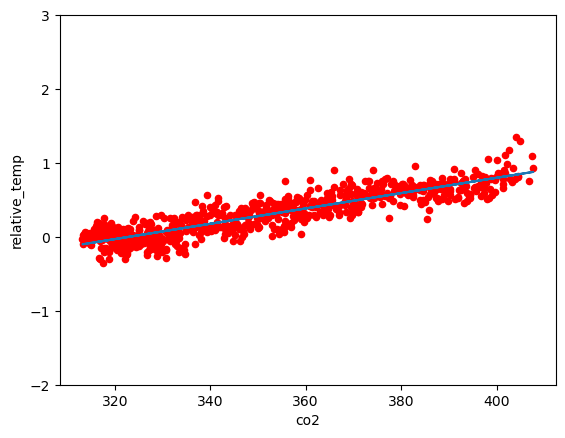

In [91]:
x=co.co2
trend=np.polyfit(co.co2,co.relative_temp,1)
polinomial = np.poly1d(trend)
co.plot.scatter('co2','relative_temp',color='red')
plt.plot(x,polinomial(x))
plt.yticks([-2,-1,0,1,2,3])
plt.show()


#### 4. El archivo <tt>Noisy_Signal.csv</tt> contiene 50 muestras de una señal. La primera columna es el índice de tiempo y las 50 restantes las medidad repetidas de la señal. Grafique el promedio de las 50 medidas en el tiempo e incluya bandas con la desviación estándar, como se muestra a continuación:

In [ ]:
signals = pd.read_csv('archivos/Noisy_Signal.csv',sep=',')
serie = pd.DataFrame()
for idx in range(0,2048,1):
    serie[idx] = signals.values[idx][1:]
promedio = serie.mean()
plt.scatter(x=signals.t,y=promedio)
plt.yticks([-1,-0.5,0,0.5,1])



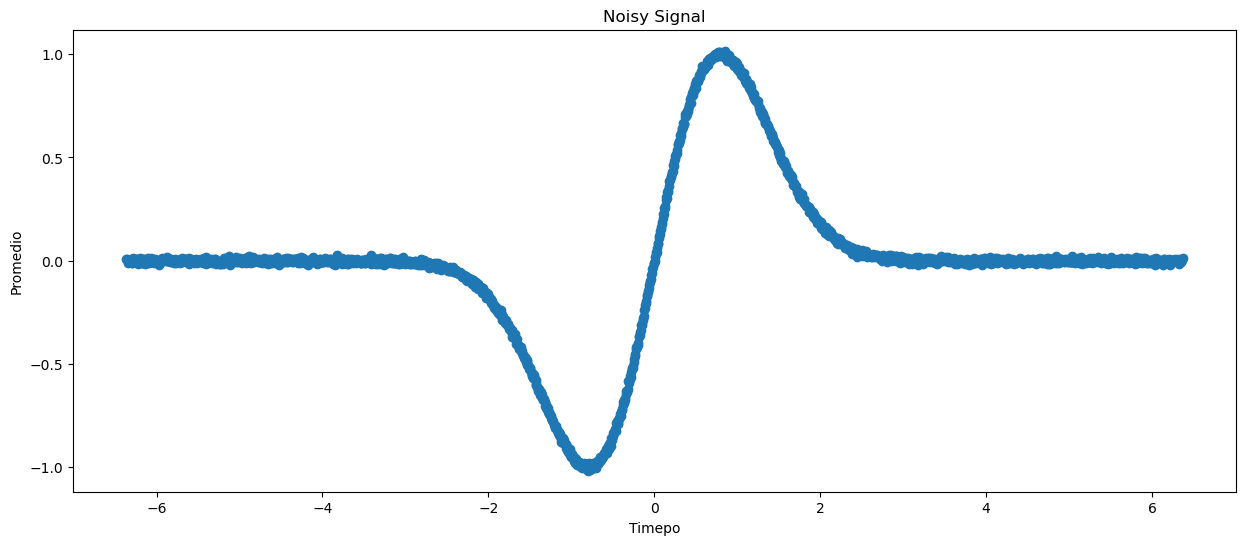

In [96]:
plt.figure(figsize=(15,6))
plt.scatter(x=signals.t,y=promedio)
plt.yticks([-1,-0.5,0,0.5,1])
plt.xlabel('Timepo')
plt.title('Noisy Signal')
plt.ylabel('Promedio')
plt.show()